In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture as GMM
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 8

In [33]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("U.A.")
    plt.ylabel("U.A.")
    return plt

In [34]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

In [35]:
def SelBest(arr:list, X:int)->list:
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [36]:
#load out dataset
embeddings=pd.read_csv('stac.csv').to_numpy()
print(embeddings)

[[     0 238401]
 [     1 583946]
 [     2 301121]
 ...
 [ 99997 675641]
 [ 99998  71489]
 [ 99999 962256]]


For i = 1


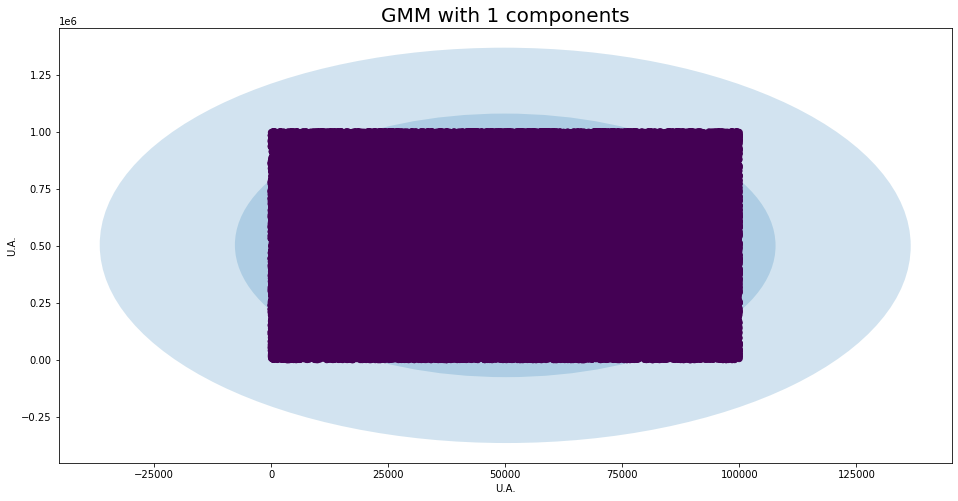

For i = 2


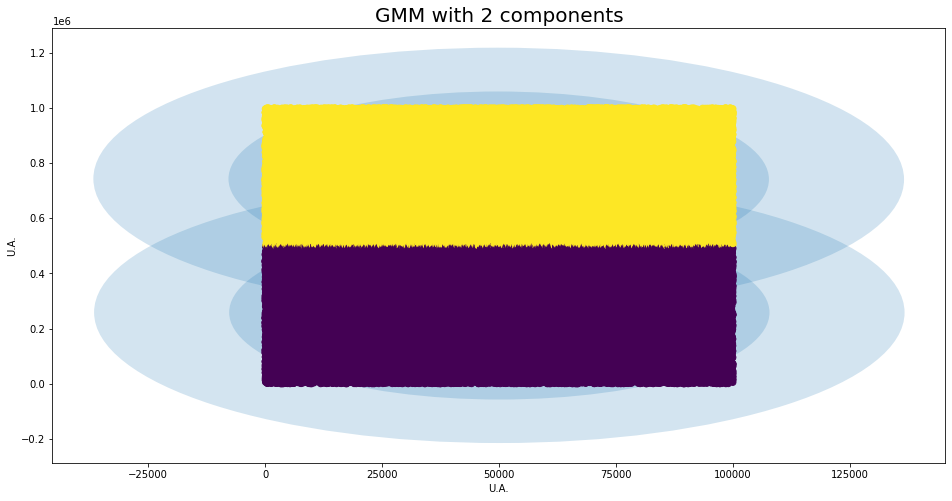

For i = 3


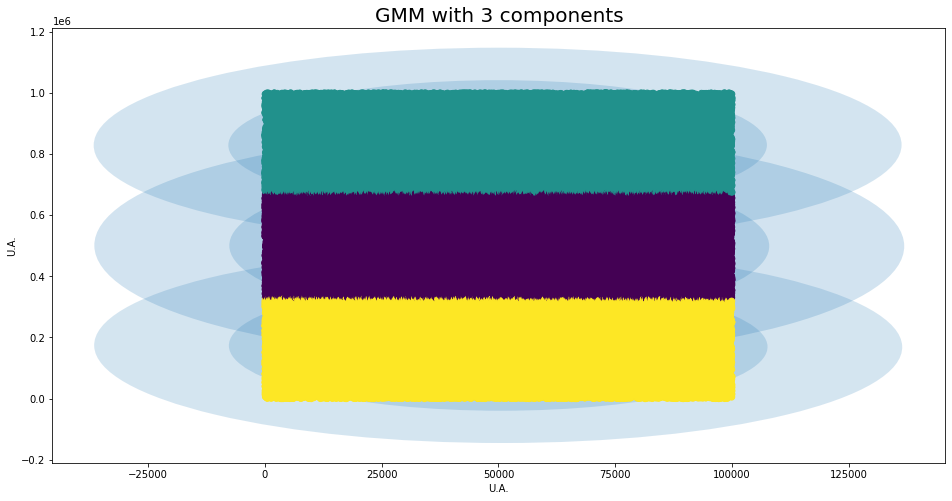

For i = 4


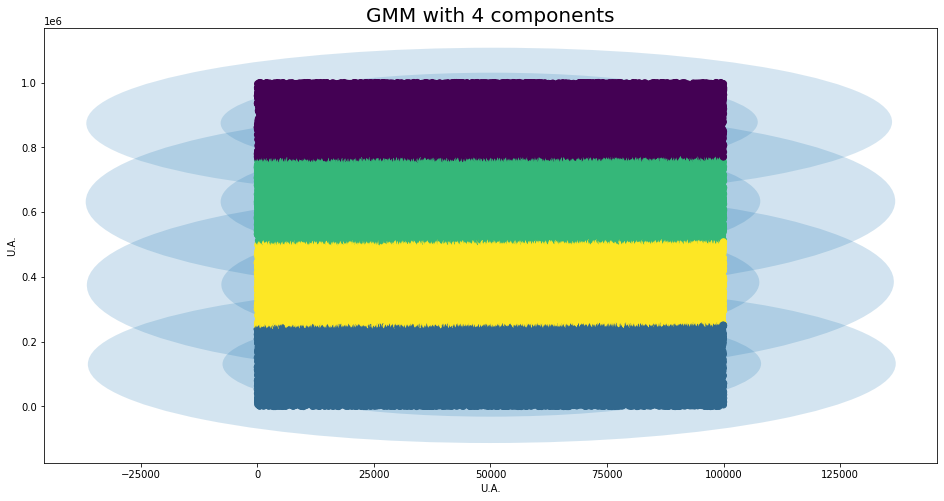

For i = 5


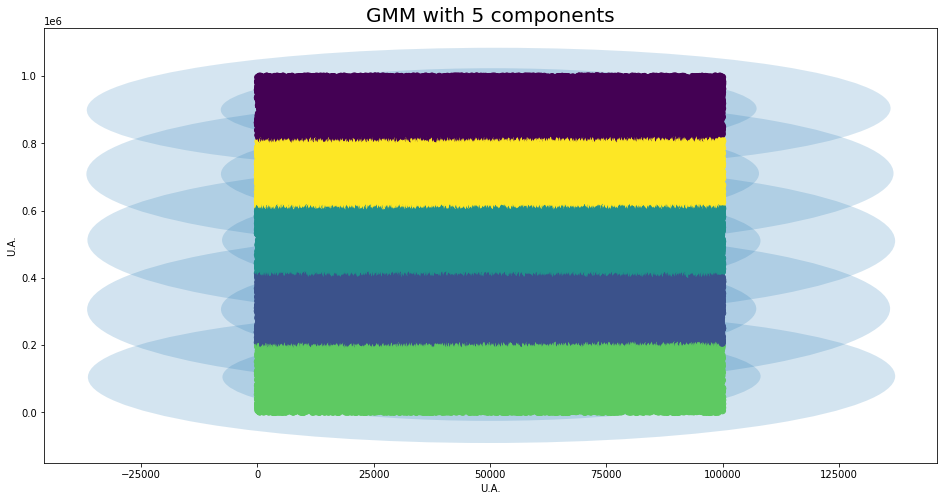

For i = 6


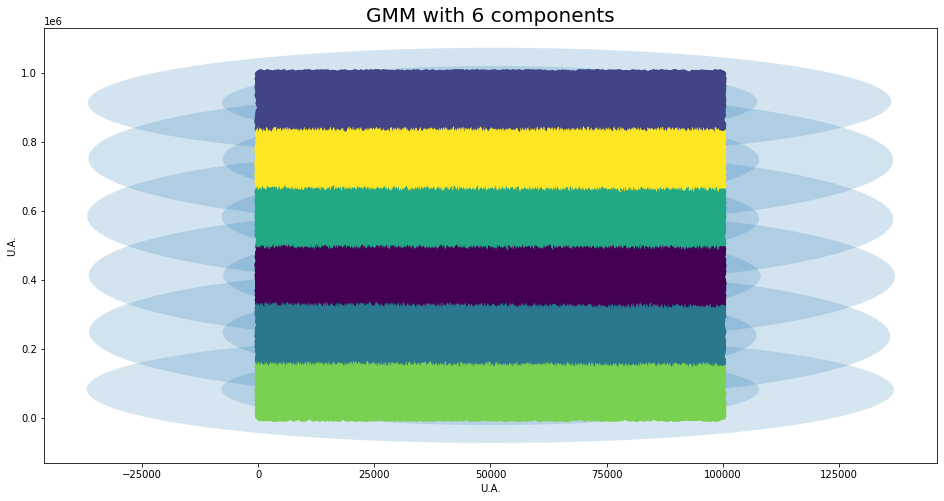

For i = 7


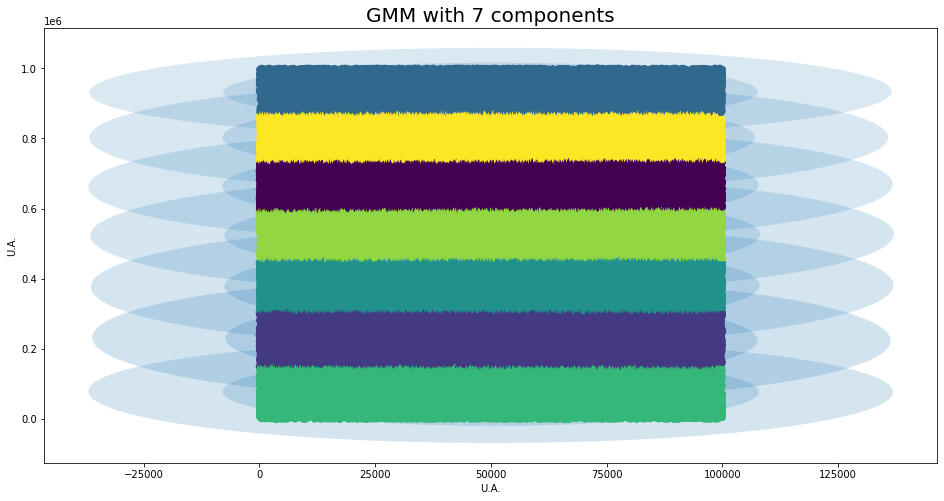

For i = 8


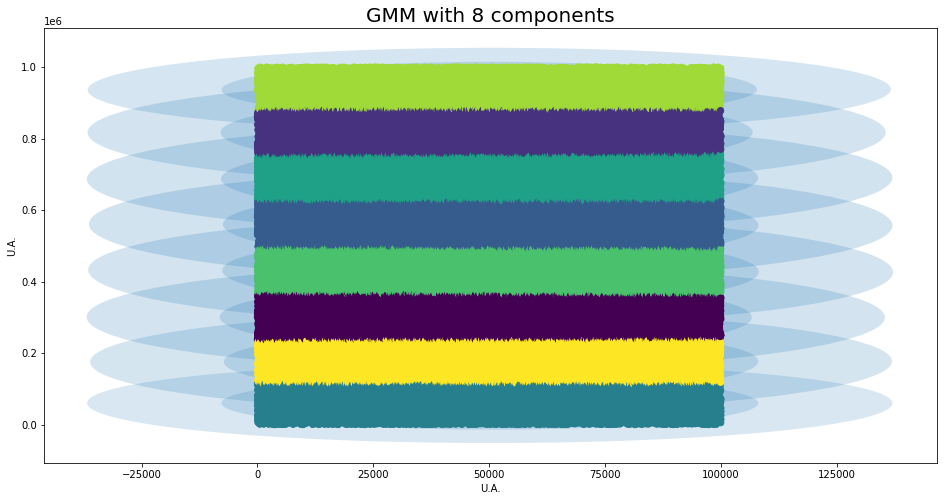

For i = 9


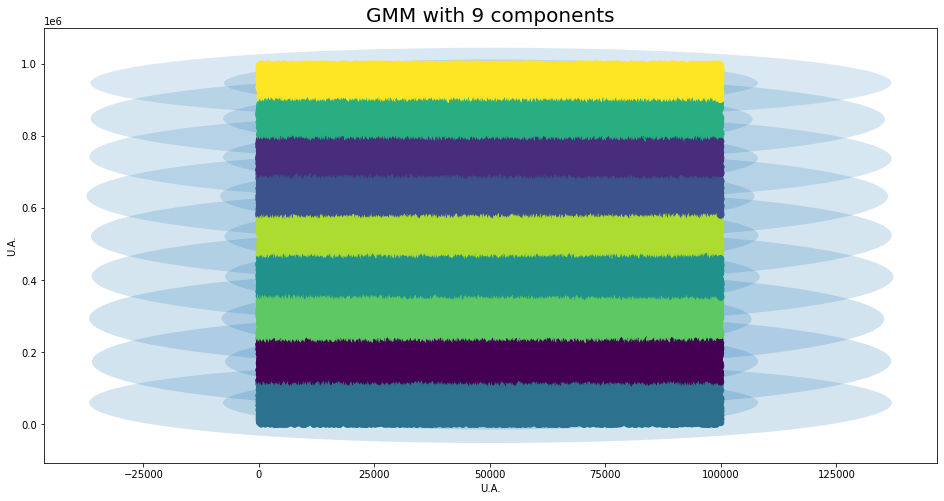

For i = 10


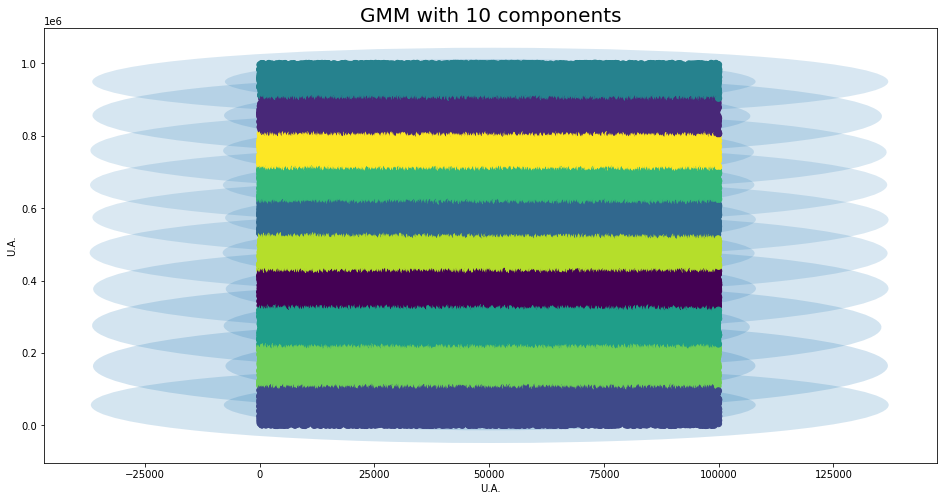

For i = 11


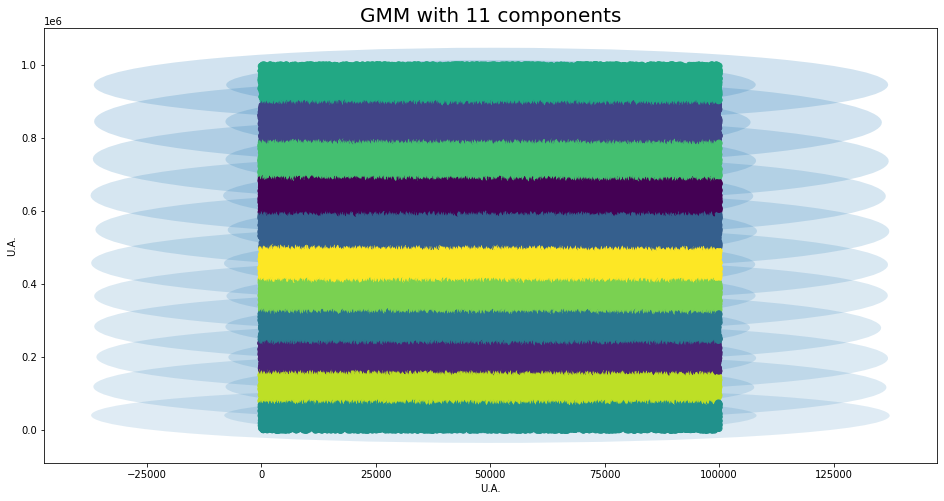

For i = 12


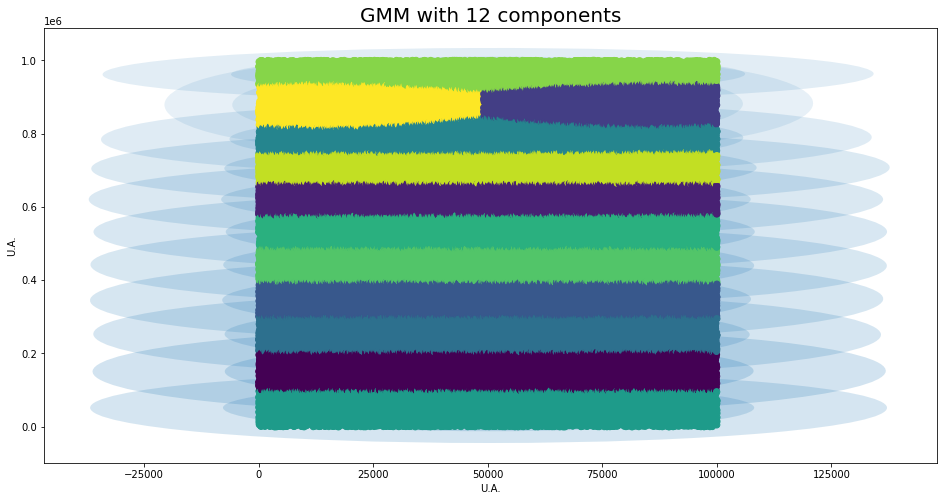

For i = 13


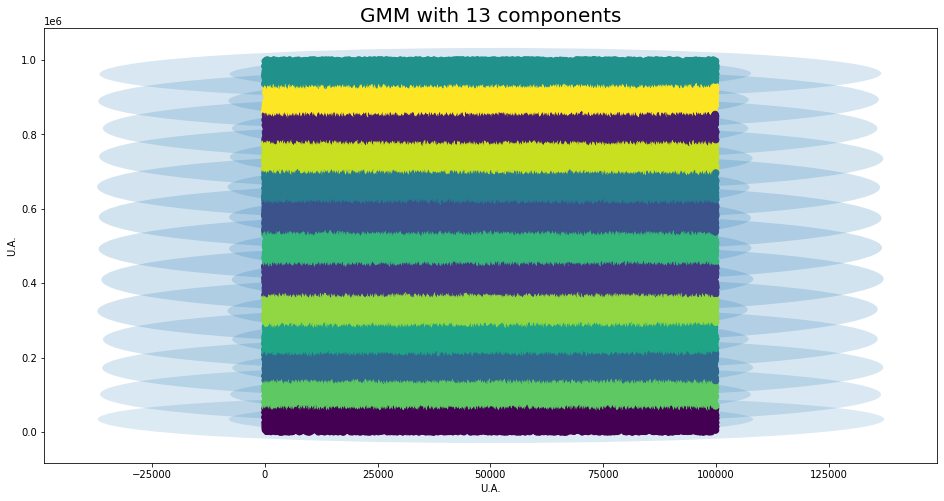

For i = 14


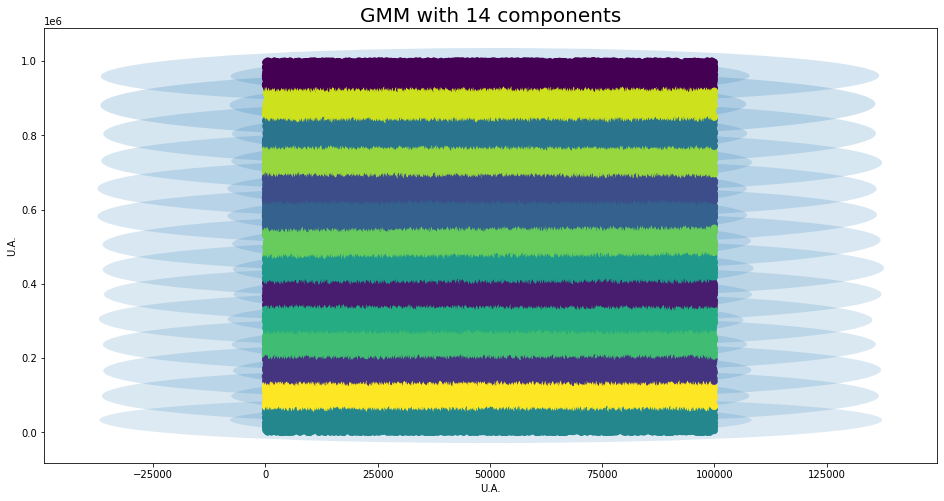

In [38]:
#visualisizing the data
for i in range(1,15):
    print("For i =" , i)
    gmm=GMM(i).fit(embeddings) 
    plt = plot_gmm(gmm, embeddings)
    plt.show()

### BIC

In [21]:
n_clusters=np.arange(2, 10)
bics=[]
bics_err=[]
iterations=5
for n in n_clusters:
    print(n)
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=2).fit(embeddings) 
        
        tmp_bic.append(gmm.bic(embeddings))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    
    bics_err.append(err)

2
3
4
5
6
7
8
9


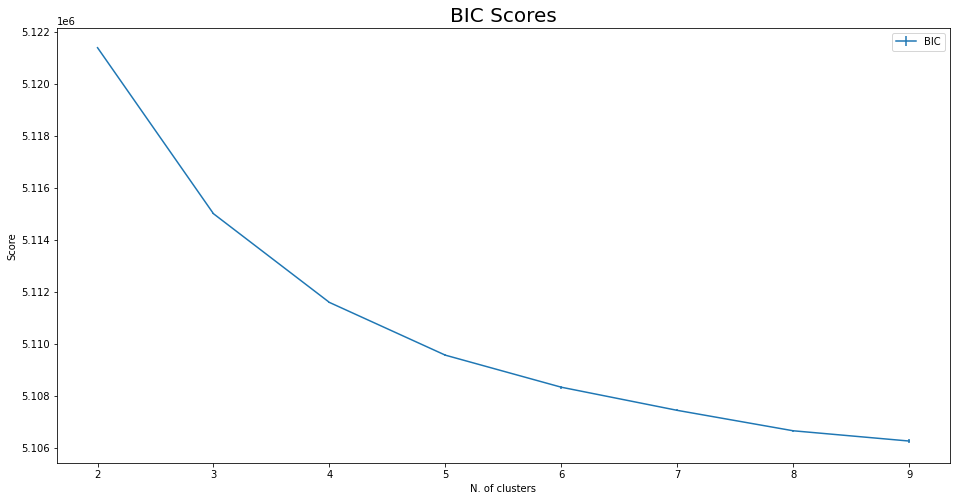

In [22]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

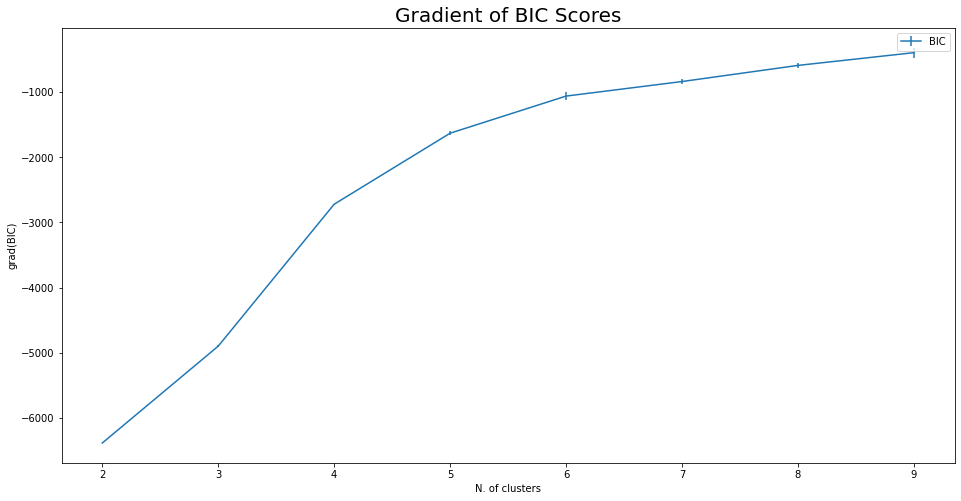

In [23]:
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("grad(BIC)")
plt.legend()

## Part 1
From the gradiant of BIC scores, we can see that the gradient does not change much after 6 clusters. Hence the value of q should be 5 or 6. Considering 5 clusters, below are the mean and standard deviations of the Gaussian Mixture Model

In [39]:
gmm=GMM(5).fit(embeddings)
print(gmm.means_)

[[ 50268.74936474 510912.25881337]
 [ 49697.68530019 306993.09002528]
 [ 49713.56625144 901766.0961349 ]
 [ 50326.21625846 106085.6197397 ]
 [ 49986.42475305 709537.240601  ]]


In [43]:
cov = gmm.covariances_
stds = [ np.sqrt(  np.trace(cov[i])/5) for i in range(0,5) ]
print(stds)

[36293.7968619791, 36545.920660693744, 30095.874478732367, 32088.917077316113, 35264.48465602447]


## Part2 
Q is essentially the number of clusters in the distribution of the data.